In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import csv
import pickle
import numpy as np
import seaborn as sns
from sklearn import decomposition
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt
import pandas as pd
sns.set(color_codes=True)
%matplotlib inline 

In [ ]:
data_frame = pd.read_csv("/content/drive/MyDrive/hemolysis/FVs-Merged-Labled-pos_neg.csv")

In [ ]:
data_frame.shape

(1220, 155)

In [ ]:
data_frame.head(5)

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,...,F115,F116,F117,F118,F119,F120,F121,F122,F123,F124,F125,F126,F127,F128,F129,F130,F131,F132,F133,F134,F135,F136,F137,F138,F139,F140,F141,F142,F143,F144,F145,F146,F147,F148,F149,F150,F151,F152,Positive,Nagetive
0,2246,17529,178835,2053029,17122,132541,1349681,169224,1292329,1895104,2246,-39352605,689504726039,-12080948547355143,-38438890,673495303813,-11800443558782853,657857680920,-11526452974094719,-11258825470823944,6.943751e+16,4.168484e+18,4.539023e+23,-1.653375e+27,4.168484e+18,2.560328e+22,-1.447345e+26,4.539023e+23,-1.447345e+26,-1.653375e+27,16,4,20,12,13,12,2,13,13,11,...,-17146538268526557117757465,-1131215892935,4158773088822407599,-15289206695534861699752727,3708290289245478265,-13633063287716643213250791,-12156315125374851030256445,4.168175e+26,1.550323e+29,1.375887e+34,-1.068445e+38,1.550323e+29,7.907290e+32,-5.598586e+36,1.375887e+34,-5.598586e+36,-1.068445e+38,1638,125,2146,1038,1730,1406,71,1763,1554,1043,780,1055,228,1177,1364,2346,1856,1284,346,1360,0,0,1
1,165,478,1678,6640,399,1112,3778,1159,3106,3747,165,-78392,37244570,-17695286636,-65436,31088798,-14770477608,25950922,-12329326908,-10291817814,4.681122e+05,8.427282e+06,5.524012e+09,8.305676e+11,8.427282e+06,5.090301e+08,4.379161e+10,5.524012e+09,4.379161e+10,8.305676e+11,2,0,0,0,0,3,0,1,2,6,...,-12043803540486,-1939920,5975933373,-18408903625565,9134207574,-28137974500157,-43008904906866,4.976522e+23,-5.234216e+25,1.956303e+31,-1.839723e+35,-5.234216e+25,6.878960e+29,-1.348713e+34,1.956303e+31,-1.348713e+34,-1.839723e+35,17,0,0,0,0,38,0,10,18,61,0,3,14,0,0,4,0,6,0,0,0,1,0
2,68662,2861239,157505727,9749775799,2849775,118972051,6555964967,154876633,6463049855,9452836059,68662,-196455530979,562098040471713587,-1608273412049812179615081,-195668401275,559845907027280551,-1601829613745537819442561,557602797180789133,-1595411633736461275618607,-1589019368575855679914791,7.716633e+128,2.626744e+129,3.146493e+139,-1.297585e+145,2.626744e+129,1.513598e+138,-8.601314e+143,3.146493e+139,-8.601314e+143,-1.297585e+145,456,229,384,322,377,394,127,334,428,568,...,-31428969940805759943401644734158813646,-1806889790866118472,7646888393517133858161088433,-32362185230388382422742729050659753765,7873946206102229806060340064,-33323110329689587569672509681636918565,-34312568021579749778821099853685091644,5.008407e+29,6.293669e+31,1.882154e+37,-1.843576e+41,6.293669e+31,9.949941e+35,-1.368706e+40,1.882154e+37,-1.368706e+40,-1.843576e+41,1598923,734611,1280288,1195889,1298970,1306510,384429,1158778,1525078,1893372,390968,994397,773628,721284,697783,1338539,1199780,2231554,301698,961917,0,0,1
3,5711,68981,1079211,18972389,68319,824753,12846919,1070043,12849709,18852219,5711,-393881510,27165583142160,-1873581001902754412,-390101490,26904878993504,-1855600500809710348,26646677279592,-1837792590268006916,-1820155613294423304,3.490530e+27,5.869982e+28,2.246126e+35,-3.208812e+39,5.869982e+28,1.212755e+34,-2.599913e+38,2.246126e+35,-2.599913e+38,-3.208812e+39,31,4,30,29,18,25,6,45,43,31,...,-43934808594037937266588256124,-62014407580022,1628582631433815593942,-42768793428939205168135112496,1585360591629230572208,-41633723917387797844523354808,-40528778772060650353350324050,2.930123e+27,3.476248e+29,1.106639e+35,-1.096330e+39,3.476248e+29,5.873950e+33,-8.239689e+37,1.106639e+35,-8.239689e+37,-1.096330e+39,7388,1199,8527,6489,4860,6415,1119,11805,11428,9288,2709,15000,5257,3119,3818,16646,7374,9779,627,6281,0,1,0
4,22549,545235,17457523,630421305,537731,12928489,412707723,16903889,405205129,597250961,22549,-12293958780,6702799351665598,-3654438735423736157160,-12124758588,6610549571894884,-3604143154948443525770,6519569422559356,-3554539790789049490614,-3505619115933694893102,6.617910e+66,3.754891e+69,1.747775e+76,-1.725939e+81,3.754891e+69,8.780960e+74,-1.142404e+80,1.747775e+76,-1.142404e+80,-1.725939e+81,195,45,94,154,78,175,63,98,88

In [ ]:
data_frame.tail(5)

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,...,F115,F116,F117,F118,F119,F120,F121,F122,F123,F124,F125,F126,F127,F128,F129,F130,F131,F132,F133,F134,F135,F136,F137,F138,F139,F140,F141,F142,F143,F144,F145,F146,F147,F148,F149,F150,F151,F152,Positive,Nagetive
1215,6089,77699,1307517,24736595,78266,990702,16531278,1307264,16423476,24303842,6089,-473031512,36748039623804,-2854817054569374068,-476483408,37016204118960,-2875649720756540116,37286326151036,-2896634460258113708,-2917772383533603086,2.232937e+30,1.187430e+32,2.161820e+38,-3.696495e+42,1.187430e+32,1.118663e+37,-2.773897e+41,2.161820e+38,-2.773897e+41,-3.696495e+42,29,31,32,35,20,34,24,33,36,58,...,-86763447686259616615716324945,-101027981475225,3068917010314126080474,-93224188770962697167224380780,3297440412078963753149,-100166021565104219975957992432,-107624770013624749705364402283,3.738825e+27,4.380235e+29,1.416476e+35,-1.407249e+39,4.380235e+29,7.588294e+33,-1.058188e+38,1.416476e+35,-1.058188e+38,-1.407249e+39,8254,10993,8995,13526,7202,8908,7218,8876,11150,16745,3763,6181,9818,6433,8382,15450,9546,10980,1303,2992,0,0,1
1216,15484,310865,8215659,244135211,307896,6165924,162551386,8062716,161059656,237659310,15484,-4813122795,1496134788835109,-465065905162907229519,-4767153768,1481845548165204,-460624166615951813198,1467692784668028,-456224851317125180532,-451867554068440641714,7.467118e+51,5.988755e+53,7.101833e+60,-4.249342e+65,5.988755e+53,3.652623e+59,-3.068207e+64,7.101833e+60,-3.068207e+64,-4.249342e+65,109,32,75,117,54,80,34,68,106,133,...,-205256560813913719971537062495136,-4595294342054394,983872038351724228541654,-210651182665617199646182490436006,1009730493625095974101580,-216187587780216347470656918891746,-221869502553034134586877814000912,2.526096e+28,3.192073e+30,9.495088e+35,-9.314900e+39,3.192073e+30,5.032199e+34,-6.926213e+38,9.495088e+35,-6.926213e+38,-9.314900e+39,73976,29194,57716,90339,42251,59635,26945,57380,79473,103399,27057,53526,54892,57608,48641,103971,65793,68132,11307,34106,0,0,1
1217,9648,152909,3207793,75957437,151221,2393994,50156300,3111071,49004012,71991933,9648,-1475113123,225534694570319,-34482710402834564779,-1458828987,223044960915288,-34102047056953215190,220582713563357,-33725586181224978380,-33353281378412185485,1.875616e+39,2.836849e+41,5.416311e+47,-1.688291e+52,2.836849e+41,2.807296e+46,-1.220072e+51,5.416311e+47,-1.220072e+51,-1.688291e+52,42,33,53,73,39,48,27,52,63,82,...,-4556262525361494828353481602936,-685174799162724,56651048391845379546550,-4683974495000400061237343063714,58238976421005891070630,-4815266229215745943183541648556,-4950238068754442356201547206398,9.736833e+27,1.141048e+30,3.674971e+35,-3.620027e+39,1.141048e+30,1.938899e+34,-2.703676e+38,3.674971e+35,-2.703676e+38,-3.620027e+39,18303,17507,26194,33379,16412,21167,14305,21071,30971,41082,8597,23675,22340,24088,16777,39122,29255,25152,5464,9292,0,0,1
1218,3383,33740,435248,6330560,32404,321109,4124927,399734,3940599,5548666,3383,-114108680,3848888910848,-129823132018592000,-109590328,3696484676869,-124682529619638585,3550115369030,-119745485709215833,-115003939495785262,9.729296e+21,9.147381e+23,2.173025e+29,-1.577944e+33,9.147381e+23,1.133857e+28,-1.211412e+32,2.173025e+29,-1.211412e+32,-1.577944e+33,30,4,20,29,15,22,13,15,26,37,...,-682015200193021094912578039,-8206959263535,74302929748318534087,-672712656649365114513922301,73289453451677056521,-663536997838942166587906443,-654486493080727405803528003,1.110074e+27,3.540482e+29,3.707352e+34,-2.924729e+38,3.540482e+29,1.949037e+33,-1.620284e+37,3.707352e+34,-1.620284e+37,-2.924729e+38,5975,653,3431,4956,2538,3270,1920,2427,3823,7060,1071,877,2796,4541,3269,3325,2518,3799,830,1996,0,0,1
1219,2450,20825,228305,2804927,19916,165843,1800541,206920,1701275,2428040,2450,-51000425,1061650398305,-22099847651784323,-48774284,1015309879443,-21135199054875289,970992200008,-20212658994382501,-19330389272201432,1.2

In [ ]:
print (data_frame.isnull().values.any())

False


In [ ]:
def plot_corr(data_frame, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        data_frame: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = data_frame.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


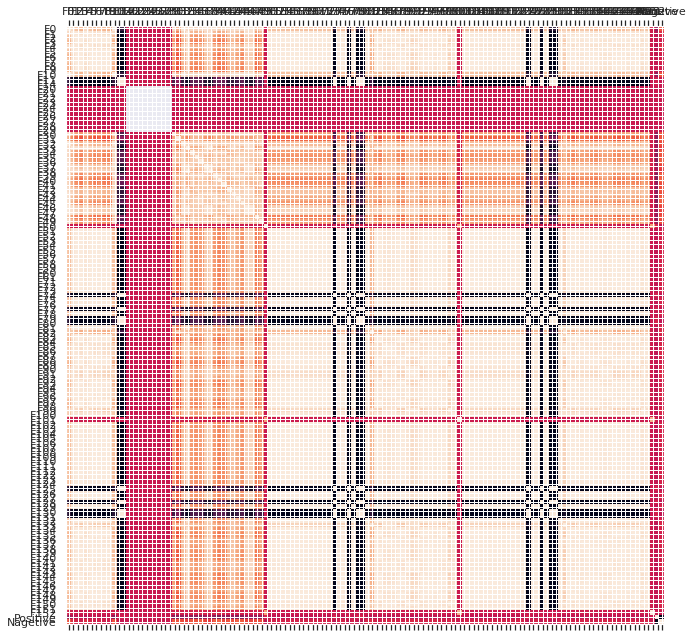

In [ ]:
plot_corr(data_frame)

In [ ]:
data_frame.corr()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F14,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,F40,F41,F42,F43,F44,F45,F46,...,F106,F107,F108,F109,F110,F111,F112,F122,F123,F124,F125,F126,F127,F128,F129,F130,F131,F132,F133,F134,F135,F136,F137,F138,F139,F140,F141,F142,F143,F144,F145,F146,F147,F148,F149,F150,F151,F152,Positive,Nagetive
F0,1.000000,0.908076,0.791089,0.724730,0.906963,0.791429,0.725255,0.789558,0.724723,0.723580,1.000000,-0.723592,-0.723476,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.928161,0.696766,0.972525,0.916284,0.898863,0.886833,0.914985,0.946634,0.926632,0.926553,0.856487,0.877014,0.919587,0.952044,0.936739,0.929101,0.973135,...,0.784701,0.783915,0.783383,0.784609,0.783843,0.784477,0.784617,0.784617,0.782514,0.784595,-0.784374,0.782514,0.784004,-0.784192,0.784595,-0.784192,-0.784374,0.805469,0.855007,0.796417,0.733314,0.818706,0.819322,0.805146,0.767092,0.753663,0.837659,0.848035,0.831984,0.757016,0.760601,0.779890,0.837981,0.756256,0.758136,0.850569,0.805992,0.046730,-0.276826,0.276826
F1,0.908076,1.000000,0.972170,0.939656,0.999956,0.972391,0.940040,0.971602,0.939759,0.939078,0.908076,-0.938954,-0.938929,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.781805,0.517859,0.879439,0.970509,0.746169,0.710040,0.751045,0.913917,0.951966,0.751197,0.666766,0.704612,0.866563,0.893358,0.804213,0.740735,0.945228,...,0.969610,0.969164,0.968852,0.969581,0.969143,0.969533,0.969570,0.969570,0.968261,0.969572,-0.969497,0.968261,0.969339,-0.969432,0.969572,-0.969432,-0.969497,0.976657,0.931046,0.974271,0.942687,0.976780,0.976727,0.975869,0.960436,0.954258,0.983193,0.985270,0.983053,0.950677,0.956528,0.964286,0.987429,0.954346,0.955919,0.981911,0.974834,0.021502,-0.115870,0.115870
F2,0.791089,0.972170,1.000000,0.993246,0.972568,0.999991,0.993408,0.999978,0.993314,0.993060,0.791089,-0.992970,-0.992975,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.646197,0.365250,0.763617,0.932882,0.602169,0.560343,0.606638,0.829698,0.898924,0.594081,0.506649,0.553183,0.780959,0.795618,0.678537,0.582907,0.862122,...,0.999914,0.999907,0.999857,0.999910,0.999904,0.999904,0.999914,0.999914,0.999408,0.999911,-0.999898,0.999408,0.999895,-0.999878,0.999911,-0.999878,-0.999898,0.997328,0.882931,0.999037,0.993154,0.985580,0.989060,0.996502,0.997730,0.996520,0.982287,0.979484,0.987640,0.992143,0.995883,0.997105,0.992837,0.996652,0.996465,0.969927,0.992513,0.006966,-0.050965,0.050965
F3,0.724730,0.939656,0.993246,1.000000,0.940158,0.993054,0.999997,0.993434,0.999995,0.999991,0.724730,-0.999992,-0.999993,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.574882,0.283567,0.698105,0.900246,0.524205,0.484367,0.531764,0.777607,0.859591,0.510405,0.423234,0.473622,0.732679,0.736927,0.612941,0.503283,0.810529,...,0.994303,0.994625,0.994765,0.994304,0.994624,0.994314,0.994326,0.994326,0.994291,0.994312,-0.994316,0.994291,0.994390,-0.994306,0.994312,-0.994306,-0.994316,0.986766,0.835335,0.990312,0.998603,0.967642,0.975206,0.986125,0.995974,0.996948,0.958963,0.954346,0.968041,0.994363,0.995092,0.993976,0.974896,0.998242,0.996363,0.940550,0.979861,0.001470,-0.029806,0.029806
F4,0.906963,0.999956,0.972568,0.940158,1.000000,0.972819,0.940554,0.972056,0.940283,0.939609,0.906963,-0.939454,-0.939441,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.780510,0.517806,0.878412,0.970221,0.744666,0.708723,0.750055,0.912858,0.951402,0.749987,0.664829,0.703137,0.865430,0.892876,0.803077,0.738964,0.944432,...,0.970056,0.969581,0.969252,0.970029,0.969563,0.969982,0.970013,0.970013,0.968649,0.970019,-0.969949,0.968649,0.969784,-0.969888,0.970019,-0.969888,-0.969949,0.977055,0.931903,0.974793,0.943232,0.977121,0.977042,0.976384,0.960857,0.954802,0.983714,0.985467,0.983407,0.950906,0.957102,0.964719,0.987657,0.954726,0.956327,0.982246,0.975125,0.021071,-0.114466,0.114466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

Check class distribution
Rare events are hard to predict

In [ ]:
num_obs = len(data_frame)
num_true = len(data_frame.loc[data_frame['Positive'] == 1])
print(num_true)

num_false = len(data_frame.loc[data_frame['Nagetive'] == 1])

print(num_false)

print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

329
891
Number of True cases:  329 (26.97%)
Number of False cases: 891 (73.03%)


**Spliting the data**
70% for training, 30% for testing



In [ ]:
#from sklearn.cross_validation import train_test_split

#feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['Positive','Nagetive']

# Separating out the target
y = data_frame.loc[:,['Positive']].values

df2 = data_frame.drop(['Positive','Nagetive'], axis=1)

# Separating out the features
x = df2.values
#print(x)




In [ ]:
#from sklearn.cross_validation import train_test_split

#feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['Positive','Nagetive']

# Separating out the target
y = data_frame.loc[:,['Positive']].values

df2 = data_frame.drop(['Positive','Nagetive'], axis=1)
df2.reset_index(inplace=True)
# Separating out the features
x = df2.values
#print(x)

# Standardizing the features
x = StandardScaler().fit_transform(x)


/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


In [ ]:

split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=1) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

## **We check to ensure we have the the desired 70% train, 30% test split of the **

In [ ]:
trainval = (1.0 * len(X_train)) / (1.0 * len(data_frame.index))
testval = (1.0 * len(X_test)) / (1.0 * len(data_frame.index))
print("{0:0.2f}% in training set".format(trainval * 100))
print("{0:0.2f}% in test set".format(testval * 100))

70.00% in training set
30.00% in test set


In [ ]:


np.random.seed(7)
sns.set()
inputSize = 194
outputCol = inputSize + 1
#Random_Clf = RandomForestClassifier(n_estimators=50, oob_score=True, random_state=29, warm_start=False)
Random_Clf = MLPClassifier(random_state=10, max_iter=25000, verbose=True, n_iter_no_change=1000)
print('Self-Consistency Test')
X =X_train
Y = y_train
#Scaler = MinMaxScaler()
#print(Scaler.fit(X))
#X = Scaler.transform(X)
std_scale = StandardScaler().fit(X)
X = std_scale.transform(X)
#pca = decomposition.PCA(n_components=2)
#pca.fit(X)
#X = pca.transform(X)
#sns.heatmap(X, cmap='hot', vmin= 0, vmax= 1, center= 0)
#plt.show()
#fig, ax = plt.subplots()
#c = ax.pcolormesh(X, cmap='RdBu', vmin=0, vmax=1)
#ax.set_title('pcolormesh')
#ig.colorbar(c, ax=ax)
#plt.show()
Random_Clf.fit(X, Y.ravel())
pred = np.round(Random_Clf.predict(X))
cm = confusion_matrix(Y, pred, labels=[1, 0]).ravel()
print(cm)
tp, fp, fn, tn = confusion_matrix(Y, pred, labels=[1, 0]).ravel()
np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y, pred), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])

pickle.dump(Random_Clf, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in Self-Results.csv')
with open('./Self-Results.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['Self-Consistency Test'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])


Self-Consistency Test
Iteration 1, loss = 0.62155268
Iteration 2, loss = 0.55306593
Iteration 3, loss = 0.50166464
Iteration 4, loss = 0.45781645
Iteration 5, loss = 0.44839132
Iteration 6, loss = 0.39643508
Iteration 7, loss = 0.37571364
Iteration 8, loss = 0.35788117
Iteration 9, loss = 0.34413814
Iteration 10, loss = 0.33257251
Iteration 11, loss = 0.32307106
Iteration 12, loss = 0.31500286
Iteration 13, loss = 0.30841787
Iteration 14, loss = 0.30153703
Iteration 15, loss = 0.29602777
Iteration 16, loss = 0.29059480
Iteration 17, loss = 0.28580805
Iteration 18, loss = 0.28075422
Iteration 19, loss = 0.27683629
Iteration 20, loss = 0.27344667
Iteration 21, loss = 0.26945918
Iteration 22, loss = 0.26649748
Iteration 23, loss = 0.26334355
Iteration 24, loss = 0.26043014
Iteration 25, loss = 0.25762032
Iteration 26, loss = 0.25554091
Iteration 27, loss = 0.25236597
Iteration 28, loss = 0.25066789
Iteration 29, loss = 0.24729231
Iteration 30, loss = 0.24618411
Iteration 31, loss = 0.2445

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

AUC: 0.99


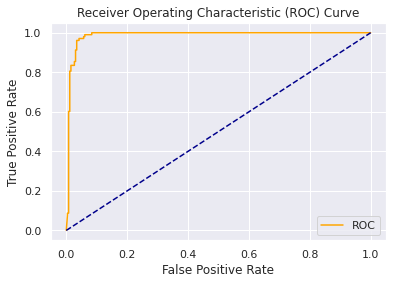

In [ ]:
probs = Random_Clf.predict_proba(X_test)
#Step 7: Keep Probabilities of the positive class only.

probs = probs[:, 1]
#Step 8: Compute the AUC Score.

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
#Step 9: Get the ROC Curve.

fpr, tpr, thresholds = roc_curve(y_test, probs)
#Step 10: Plot ROC Curve using our defined function

plot_roc_curve(fpr, tpr)